![quote](quote.png)

# Introduction

Name: Abdoul Ouedraogo

- Former Intel Software Engineer
- Graduate Student: Machine learning at Georgia Institute of Technology
- Joining next few weeks 
    The Artificial Intelligence for Medical Systems (AIMS) Lab at OHSU

# Agenda

- Basics of Reinforcement Learning
- Thompson Sampling

#  Basics of Reinforcement Learning

Branch of Machine learning in which an agent interacts with an environment in order to maximize a cummulative reward.

![RLML](RLML.png)

### 1- RL vs Traditional Machine learning

- Traditional Machine learning has input and target values. The model is trained using a known solution or answers
- There is no answers when training a reinforcement learning agent
- RL can still learn from experince in the absence of training dataset

![title](RL.png)

### 2- Exploration–Exploitation dilemma

- Exploitation: Make the best decision based on current knowledge to get reward
- Exploration: Search / Gather more information for better performence

   - Exploitation: Go to your favorite pyData pdx meetup
   - Exploration: Try a new meetup event

Online Advertisements
- Exploitation: Show the most successful app
- Exploration  Show a different app

### 3- Application of RL

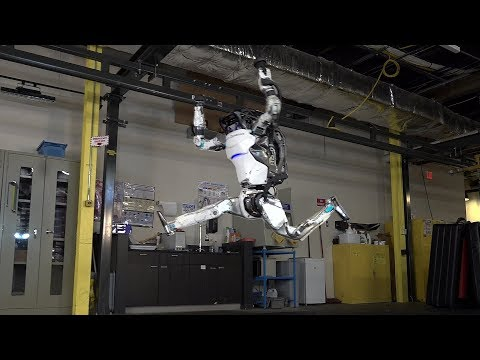

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('_sBBaNYex3E', width=800, height=450)

![title](Sutton.png)

### 4- Using MDP to formulate a RL problem

![titles](pydata.png)

# Solving the Multi-Armed Bandit Problem with Thompson Sampling

## II - The Multi-Armed Bandit Problem

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import random
from functools import reduce
from IPython.display import Image

In [3]:
# Importing the dataset
dataset = pd.read_csv("Apps_CTR_Thompson_Sampling.csv")
df = dataset.copy()

### 2- CTR

In [4]:
dataset.shape

(20000, 10)

In [5]:
dataset.head(20)

,App 1,App 2,App 3,App 4,App 5,App 6,App 7,App 8,App 9,App 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


In [6]:
episodes = df.shape[0]
d = df.shape[1]

selected_app = []
positive_reward = [0]*d
zero_reward = [0]*d
final_reward = 0

for y in range(0, episodes):
    apps = 0
    random_max_value = 0
    for i in range(0, d):
        random_pick = random.betavariate(positive_reward[i] + 1, zero_reward[i] + 1)
        if random_pick > random_max_value:
            random_max_value = random_pick
            apps = i
    selected_app.append(apps)
    reward = df.values[y, apps]
    
    if reward == 1:
        positive_reward[apps] += 1
        print("Recived positive reward: ", positive_reward)
    else:
        zero_reward[apps] += 1
        print("Recived negative reward: ", zero_reward)
    final_reward += reward


Recived positive reward:  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Recived negative reward:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Recived negative reward:  [0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
Recived negative reward:  [1, 0, 0, 0, 0, 0, 0, 0, 1, 1]
Recived negative reward:  [1, 0, 0, 0, 0, 0, 1, 0, 1, 1]
Recived negative reward:  [1, 0, 0, 0, 0, 1, 1, 0, 1, 1]
Recived negative reward:  [1, 0, 0, 0, 0, 2, 1, 0, 1, 1]
Recived negative reward:  [1, 0, 1, 0, 0, 2, 1, 0, 1, 1]
Recived negative reward:  [1, 1, 1, 0, 0, 2, 1, 0, 1, 1]
Recived negative reward:  [1, 1, 1, 1, 0, 2, 1, 0, 1, 1]
Recived negative reward:  [2, 1, 1, 1, 0, 2, 1, 0, 1, 1]
Recived negative reward:  [2, 1, 1, 2, 0, 2, 1, 0, 1, 1]
Recived negative reward:  [2, 1, 1, 2, 1, 2, 1, 0, 1, 1]
Recived negative reward:  [2, 1, 1, 2, 1, 2, 1, 1, 1, 1]
Recived negative reward:  [2, 2, 1, 2, 1, 2, 1, 1, 1, 1]
Recived negative reward:  [2, 2, 1, 3, 1, 2, 1, 1, 1, 1]
Recived negative reward:  [2, 2, 2, 3, 1, 2, 1, 1, 1, 1]
Recived negative reward:  [3, 2

Recived positive reward:  [2, 10, 2, 1, 130, 0, 11, 40, 4, 0]
Recived negative reward:  [29, 58, 31, 21, 363, 16, 57, 152, 33, 18]
Recived positive reward:  [2, 10, 2, 1, 131, 0, 11, 40, 4, 0]
Recived negative reward:  [29, 58, 31, 21, 364, 16, 57, 152, 33, 18]
Recived positive reward:  [2, 10, 2, 1, 132, 0, 11, 40, 4, 0]
Recived negative reward:  [29, 58, 31, 21, 365, 16, 57, 152, 33, 18]
Recived negative reward:  [29, 58, 31, 21, 365, 16, 58, 152, 33, 18]
Recived negative reward:  [29, 58, 31, 21, 366, 16, 58, 152, 33, 18]
Recived positive reward:  [2, 10, 2, 1, 133, 0, 11, 40, 4, 0]
Recived negative reward:  [29, 58, 31, 21, 367, 16, 58, 152, 33, 18]
Recived negative reward:  [29, 58, 31, 21, 368, 16, 58, 152, 33, 18]
Recived negative reward:  [29, 58, 31, 21, 369, 16, 58, 152, 33, 18]
Recived negative reward:  [29, 58, 31, 21, 369, 17, 58, 152, 33, 18]
Recived negative reward:  [29, 58, 31, 21, 370, 17, 58, 152, 33, 18]
Recived negative reward:  [29, 58, 31, 21, 371, 17, 58, 152, 3

Recived positive reward:  [2, 10, 2, 1, 324, 0, 11, 41, 4, 0]
Recived positive reward:  [2, 10, 2, 1, 325, 0, 11, 41, 4, 0]
Recived positive reward:  [2, 10, 2, 1, 326, 0, 11, 41, 4, 0]
Recived positive reward:  [2, 10, 2, 1, 327, 0, 11, 41, 4, 0]
Recived negative reward:  [30, 62, 32, 24, 828, 19, 65, 166, 40, 19]
Recived positive reward:  [2, 10, 2, 1, 328, 0, 11, 41, 4, 0]
Recived negative reward:  [30, 62, 32, 24, 829, 19, 65, 166, 40, 19]
Recived negative reward:  [30, 62, 32, 24, 830, 19, 65, 166, 40, 19]
Recived negative reward:  [30, 62, 32, 24, 831, 19, 65, 166, 40, 19]
Recived negative reward:  [30, 62, 32, 24, 832, 19, 65, 166, 40, 19]
Recived negative reward:  [30, 62, 32, 24, 833, 19, 65, 166, 40, 19]
Recived negative reward:  [30, 62, 32, 24, 834, 19, 65, 166, 40, 19]
Recived negative reward:  [30, 62, 32, 24, 835, 19, 65, 166, 40, 19]
Recived positive reward:  [2, 10, 2, 1, 329, 0, 11, 41, 4, 0]
Recived positive reward:  [2, 10, 2, 1, 330, 0, 11, 41, 4, 0]
Recived negati

Recived negative reward:  [31, 65, 35, 26, 1553, 19, 68, 176, 43, 21]
Recived positive reward:  [2, 11, 3, 1, 578, 0, 11, 43, 4, 0]
Recived negative reward:  [31, 65, 35, 26, 1554, 19, 68, 176, 43, 21]
Recived positive reward:  [2, 11, 3, 1, 579, 0, 11, 43, 4, 0]
Recived negative reward:  [31, 65, 35, 26, 1555, 19, 68, 176, 43, 21]
Recived negative reward:  [31, 65, 35, 26, 1556, 19, 68, 176, 43, 21]
Recived positive reward:  [2, 11, 3, 1, 580, 0, 11, 43, 4, 0]
Recived negative reward:  [31, 65, 35, 26, 1557, 19, 68, 176, 43, 21]
Recived negative reward:  [31, 65, 35, 26, 1558, 19, 68, 176, 43, 21]
Recived negative reward:  [31, 65, 35, 26, 1559, 19, 68, 176, 43, 21]
Recived negative reward:  [31, 65, 35, 26, 1560, 19, 68, 176, 43, 21]
Recived negative reward:  [31, 65, 35, 26, 1561, 19, 68, 176, 43, 21]
Recived negative reward:  [31, 65, 35, 26, 1562, 19, 68, 176, 43, 21]
Recived negative reward:  [31, 65, 35, 26, 1563, 19, 68, 176, 43, 21]
Recived negative reward:  [31, 65, 35, 26, 1

Recived negative reward:  [34, 68, 36, 27, 2162, 24, 73, 182, 43, 22]
Recived negative reward:  [34, 68, 36, 27, 2163, 24, 73, 182, 43, 22]
Recived negative reward:  [34, 68, 36, 27, 2164, 24, 73, 182, 43, 22]
Recived negative reward:  [34, 68, 36, 27, 2165, 24, 73, 182, 43, 22]
Recived negative reward:  [34, 68, 36, 27, 2166, 24, 73, 182, 43, 22]
Recived negative reward:  [34, 68, 36, 27, 2167, 24, 73, 182, 43, 22]
Recived negative reward:  [34, 68, 36, 27, 2168, 24, 73, 182, 43, 22]
Recived negative reward:  [34, 68, 36, 27, 2169, 24, 73, 182, 43, 22]
Recived negative reward:  [34, 68, 36, 27, 2170, 24, 73, 182, 43, 22]
Recived negative reward:  [34, 68, 36, 27, 2171, 24, 73, 182, 43, 22]
Recived negative reward:  [34, 68, 36, 27, 2172, 24, 73, 182, 43, 22]
Recived positive reward:  [3, 11, 3, 1, 812, 1, 12, 43, 4, 0]
Recived positive reward:  [3, 11, 3, 1, 813, 1, 12, 43, 4, 0]
Recived negative reward:  [34, 68, 36, 27, 2173, 24, 73, 182, 43, 22]
Recived negative reward:  [34, 68, 3

Recived positive reward:  [6, 11, 3, 1, 1053, 1, 12, 44, 4, 0]
Recived positive reward:  [6, 11, 3, 1, 1054, 1, 12, 44, 4, 0]
Recived negative reward:  [39, 69, 36, 28, 2733, 28, 76, 185, 45, 22]
Recived positive reward:  [6, 11, 3, 1, 1055, 1, 12, 44, 4, 0]
Recived negative reward:  [39, 69, 36, 28, 2734, 28, 76, 185, 45, 22]
Recived negative reward:  [39, 69, 36, 28, 2735, 28, 76, 185, 45, 22]
Recived negative reward:  [39, 69, 36, 28, 2736, 28, 76, 185, 45, 22]
Recived negative reward:  [39, 69, 36, 28, 2737, 28, 76, 185, 45, 22]
Recived negative reward:  [39, 69, 36, 28, 2738, 28, 76, 185, 45, 22]
Recived positive reward:  [6, 11, 3, 1, 1056, 1, 12, 44, 4, 0]
Recived negative reward:  [39, 69, 36, 28, 2739, 28, 76, 185, 45, 22]
Recived negative reward:  [39, 69, 36, 28, 2740, 28, 76, 185, 45, 22]
Recived negative reward:  [39, 69, 36, 28, 2741, 28, 76, 185, 45, 22]
Recived negative reward:  [39, 69, 36, 28, 2742, 28, 76, 185, 45, 22]
Recived negative reward:  [39, 69, 36, 28, 2743,

Recived positive reward:  [6, 11, 4, 1, 1326, 1, 12, 44, 4, 0]
Recived positive reward:  [6, 11, 4, 1, 1327, 1, 12, 44, 4, 0]
Recived negative reward:  [47, 72, 40, 30, 3507, 28, 76, 187, 45, 25]
Recived negative reward:  [47, 72, 40, 30, 3508, 28, 76, 187, 45, 25]
Recived positive reward:  [6, 11, 4, 1, 1328, 1, 12, 44, 4, 0]
Recived negative reward:  [47, 72, 40, 30, 3509, 28, 76, 187, 45, 25]
Recived positive reward:  [6, 11, 4, 1, 1329, 1, 12, 44, 4, 0]
Recived negative reward:  [47, 72, 40, 30, 3510, 28, 76, 187, 45, 25]
Recived negative reward:  [47, 72, 40, 30, 3511, 28, 76, 187, 45, 25]
Recived negative reward:  [47, 72, 40, 30, 3512, 28, 76, 187, 45, 25]
Recived positive reward:  [6, 11, 4, 1, 1330, 1, 12, 44, 4, 0]
Recived negative reward:  [47, 72, 40, 30, 3513, 28, 76, 187, 45, 25]
Recived negative reward:  [47, 72, 40, 30, 3514, 28, 76, 187, 45, 25]
Recived negative reward:  [47, 72, 40, 30, 3515, 28, 76, 187, 45, 25]
Recived positive reward:  [6, 11, 4, 1, 1331, 1, 12, 44

Recived positive reward:  [6, 11, 5, 1, 1519, 1, 12, 44, 4, 0]
Recived positive reward:  [6, 11, 5, 1, 1520, 1, 12, 44, 4, 0]
Recived positive reward:  [6, 11, 5, 1, 1520, 1, 12, 45, 4, 0]
Recived negative reward:  [48, 73, 43, 30, 4097, 28, 79, 189, 46, 25]
Recived negative reward:  [48, 73, 43, 30, 4098, 28, 79, 189, 46, 25]
Recived negative reward:  [48, 73, 43, 30, 4099, 28, 79, 189, 46, 25]
Recived negative reward:  [48, 73, 43, 30, 4100, 28, 79, 189, 46, 25]
Recived negative reward:  [48, 73, 43, 30, 4101, 28, 79, 189, 46, 25]
Recived negative reward:  [48, 74, 43, 30, 4101, 28, 79, 189, 46, 25]
Recived positive reward:  [6, 11, 5, 1, 1521, 1, 12, 45, 4, 0]
Recived positive reward:  [6, 11, 5, 1, 1522, 1, 12, 45, 4, 0]
Recived negative reward:  [48, 74, 43, 30, 4102, 28, 79, 189, 46, 25]
Recived negative reward:  [48, 74, 43, 30, 4103, 28, 79, 189, 46, 25]
Recived positive reward:  [6, 11, 5, 1, 1523, 1, 12, 45, 4, 0]
Recived positive reward:  [6, 11, 5, 1, 1524, 1, 12, 45, 4, 0]

Recived negative reward:  [51, 75, 47, 31, 4943, 29, 80, 193, 47, 25]
Recived negative reward:  [51, 75, 47, 31, 4943, 30, 80, 193, 47, 25]
Recived positive reward:  [6, 11, 5, 1, 1808, 1, 12, 46, 4, 0]
Recived negative reward:  [51, 75, 47, 31, 4944, 30, 80, 193, 47, 25]
Recived positive reward:  [6, 11, 5, 1, 1809, 1, 12, 46, 4, 0]
Recived negative reward:  [51, 75, 47, 31, 4945, 30, 80, 193, 47, 25]
Recived positive reward:  [6, 11, 5, 1, 1810, 1, 12, 46, 4, 0]
Recived negative reward:  [51, 75, 47, 31, 4946, 30, 80, 193, 47, 25]
Recived negative reward:  [51, 75, 47, 31, 4947, 30, 80, 193, 47, 25]
Recived negative reward:  [51, 75, 47, 31, 4948, 30, 80, 193, 47, 25]
Recived negative reward:  [51, 75, 47, 31, 4949, 30, 80, 193, 47, 25]
Recived positive reward:  [6, 11, 5, 1, 1811, 1, 12, 46, 4, 0]
Recived negative reward:  [51, 75, 47, 31, 4950, 30, 80, 193, 47, 25]
Recived positive reward:  [6, 11, 5, 1, 1812, 1, 12, 46, 4, 0]
Recived negative reward:  [51, 75, 47, 31, 4951, 30, 80

Recived negative reward:  [53, 76, 48, 31, 5718, 30, 80, 201, 48, 25]
Recived positive reward:  [6, 11, 5, 1, 2078, 1, 13, 47, 4, 0]
Recived positive reward:  [6, 11, 5, 1, 2079, 1, 13, 47, 4, 0]
Recived negative reward:  [53, 76, 48, 31, 5719, 30, 80, 201, 48, 25]
Recived negative reward:  [53, 76, 48, 31, 5720, 30, 80, 201, 48, 25]
Recived negative reward:  [53, 76, 48, 31, 5721, 30, 80, 201, 48, 25]
Recived negative reward:  [53, 76, 48, 31, 5722, 30, 80, 201, 48, 25]
Recived negative reward:  [53, 76, 48, 31, 5723, 30, 80, 201, 48, 25]
Recived positive reward:  [6, 11, 5, 1, 2080, 1, 13, 47, 4, 0]
Recived negative reward:  [53, 76, 48, 31, 5724, 30, 80, 201, 48, 25]
Recived positive reward:  [6, 11, 5, 1, 2081, 1, 13, 47, 4, 0]
Recived positive reward:  [6, 11, 5, 1, 2082, 1, 13, 47, 4, 0]
Recived negative reward:  [53, 76, 48, 31, 5725, 30, 80, 201, 48, 25]
Recived positive reward:  [6, 11, 5, 1, 2083, 1, 13, 47, 4, 0]
Recived negative reward:  [53, 76, 48, 31, 5726, 30, 80, 201, 

Recived negative reward:  [53, 79, 49, 31, 6361, 31, 81, 204, 49, 26]
Recived negative reward:  [53, 79, 49, 31, 6362, 31, 81, 204, 49, 26]
Recived negative reward:  [53, 79, 49, 31, 6363, 31, 81, 204, 49, 26]
Recived positive reward:  [6, 12, 5, 1, 2326, 1, 14, 47, 4, 0]
Recived negative reward:  [53, 79, 49, 31, 6364, 31, 81, 204, 49, 26]
Recived negative reward:  [53, 79, 49, 31, 6365, 31, 81, 204, 49, 26]
Recived positive reward:  [6, 12, 5, 1, 2327, 1, 14, 47, 4, 0]
Recived positive reward:  [6, 12, 5, 1, 2328, 1, 14, 47, 4, 0]
Recived positive reward:  [6, 12, 5, 1, 2329, 1, 14, 47, 4, 0]
Recived negative reward:  [53, 79, 49, 31, 6366, 31, 81, 204, 49, 26]
Recived negative reward:  [53, 79, 49, 31, 6367, 31, 81, 204, 49, 26]
Recived negative reward:  [53, 79, 49, 31, 6368, 31, 81, 204, 49, 26]
Recived positive reward:  [6, 12, 5, 1, 2330, 1, 14, 47, 4, 0]
Recived positive reward:  [6, 12, 5, 1, 2331, 1, 14, 47, 4, 0]
Recived negative reward:  [53, 79, 49, 31, 6369, 31, 81, 204, 

Recived negative reward:  [53, 81, 49, 32, 7141, 32, 84, 207, 49, 26]
Recived positive reward:  [6, 12, 5, 1, 2629, 1, 15, 49, 4, 0]
Recived positive reward:  [6, 12, 5, 1, 2630, 1, 15, 49, 4, 0]
Recived negative reward:  [53, 81, 49, 32, 7142, 32, 84, 207, 49, 26]
Recived negative reward:  [53, 81, 49, 32, 7143, 32, 84, 207, 49, 26]
Recived positive reward:  [6, 12, 5, 1, 2631, 1, 15, 49, 4, 0]
Recived negative reward:  [53, 81, 49, 32, 7144, 32, 84, 207, 49, 26]
Recived negative reward:  [53, 81, 49, 32, 7145, 32, 84, 207, 49, 26]
Recived positive reward:  [6, 12, 5, 1, 2632, 1, 15, 49, 4, 0]
Recived negative reward:  [53, 81, 49, 32, 7146, 32, 84, 207, 49, 26]
Recived negative reward:  [53, 81, 49, 32, 7147, 32, 84, 207, 49, 26]
Recived negative reward:  [53, 81, 49, 32, 7148, 32, 84, 207, 49, 26]
Recived negative reward:  [53, 81, 49, 32, 7149, 32, 84, 207, 49, 26]
Recived negative reward:  [53, 81, 49, 32, 7150, 32, 84, 207, 49, 26]
Recived negative reward:  [53, 81, 49, 32, 7151,

Recived negative reward:  [53, 81, 51, 32, 7702, 32, 87, 213, 49, 26]
Recived negative reward:  [53, 81, 51, 32, 7703, 32, 87, 213, 49, 26]
Recived negative reward:  [53, 81, 51, 32, 7704, 32, 87, 213, 49, 26]
Recived negative reward:  [53, 81, 51, 32, 7705, 32, 87, 213, 49, 26]
Recived negative reward:  [53, 81, 51, 32, 7706, 32, 87, 213, 49, 26]
Recived negative reward:  [53, 81, 51, 32, 7707, 32, 87, 213, 49, 26]
Recived negative reward:  [53, 81, 51, 32, 7708, 32, 87, 213, 49, 26]
Recived negative reward:  [53, 81, 51, 32, 7709, 32, 87, 213, 49, 26]
Recived negative reward:  [53, 81, 51, 32, 7710, 32, 87, 213, 49, 26]
Recived negative reward:  [53, 81, 51, 32, 7711, 32, 87, 213, 49, 26]
Recived negative reward:  [53, 81, 51, 32, 7712, 32, 87, 213, 49, 26]
Recived negative reward:  [53, 81, 51, 32, 7713, 32, 87, 213, 49, 26]
Recived positive reward:  [6, 12, 5, 1, 2853, 1, 15, 51, 4, 0]
Recived negative reward:  [53, 81, 51, 32, 7714, 32, 87, 213, 49, 26]
Recived negative reward:  [

Recived positive reward:  [7, 12, 5, 1, 3142, 1, 15, 52, 4, 0]
Recived negative reward:  [53, 81, 51, 32, 8483, 32, 90, 213, 49, 26]
Recived negative reward:  [53, 81, 51, 32, 8484, 32, 90, 213, 49, 26]
Recived positive reward:  [7, 12, 5, 1, 3143, 1, 15, 52, 4, 0]
Recived positive reward:  [7, 12, 5, 1, 3144, 1, 15, 52, 4, 0]
Recived negative reward:  [53, 81, 51, 32, 8485, 32, 90, 213, 49, 26]
Recived positive reward:  [7, 12, 5, 1, 3145, 1, 15, 52, 4, 0]
Recived negative reward:  [53, 81, 51, 32, 8486, 32, 90, 213, 49, 26]
Recived negative reward:  [53, 81, 51, 32, 8487, 32, 90, 213, 49, 26]
Recived negative reward:  [53, 81, 51, 32, 8488, 32, 90, 213, 49, 26]
Recived positive reward:  [7, 12, 5, 1, 3146, 1, 15, 52, 4, 0]
Recived negative reward:  [53, 81, 51, 32, 8489, 32, 90, 213, 49, 26]
Recived negative reward:  [53, 81, 51, 32, 8490, 32, 90, 213, 49, 26]
Recived negative reward:  [53, 81, 51, 32, 8491, 32, 90, 213, 49, 26]
Recived negative reward:  [53, 81, 51, 32, 8492, 32, 90

Recived negative reward:  [54, 81, 51, 32, 8862, 32, 90, 216, 50, 26]
Recived positive reward:  [7, 12, 5, 1, 3263, 1, 15, 53, 4, 0]
Recived positive reward:  [7, 12, 5, 1, 3264, 1, 15, 53, 4, 0]
Recived positive reward:  [7, 12, 5, 1, 3265, 1, 15, 53, 4, 0]
Recived negative reward:  [54, 81, 51, 32, 8863, 32, 90, 216, 50, 26]
Recived negative reward:  [54, 81, 51, 32, 8864, 32, 90, 216, 50, 26]
Recived positive reward:  [7, 12, 5, 1, 3266, 1, 15, 53, 4, 0]
Recived negative reward:  [54, 81, 51, 32, 8865, 32, 90, 216, 50, 26]
Recived positive reward:  [7, 12, 5, 1, 3267, 1, 15, 53, 4, 0]
Recived negative reward:  [54, 81, 51, 32, 8866, 32, 90, 216, 50, 26]
Recived positive reward:  [7, 12, 5, 1, 3268, 1, 15, 53, 4, 0]
Recived negative reward:  [54, 81, 51, 32, 8867, 32, 90, 216, 50, 26]
Recived negative reward:  [54, 81, 51, 32, 8868, 32, 90, 216, 50, 26]
Recived negative reward:  [54, 81, 51, 32, 8869, 32, 90, 216, 50, 26]
Recived positive reward:  [7, 12, 5, 1, 3269, 1, 15, 53, 4, 0]

Recived negative reward:  [59, 81, 52, 34, 9501, 32, 90, 216, 51, 26]
Recived positive reward:  [9, 12, 5, 1, 3510, 1, 16, 56, 4, 0]
Recived negative reward:  [59, 81, 52, 34, 9502, 32, 90, 216, 51, 26]
Recived negative reward:  [59, 81, 52, 34, 9503, 32, 90, 216, 51, 26]
Recived negative reward:  [59, 81, 52, 34, 9504, 32, 90, 216, 51, 26]
Recived negative reward:  [59, 81, 52, 34, 9505, 32, 90, 216, 51, 26]
Recived positive reward:  [9, 12, 5, 1, 3511, 1, 16, 56, 4, 0]
Recived negative reward:  [59, 81, 52, 34, 9506, 32, 90, 216, 51, 26]
Recived negative reward:  [59, 81, 52, 34, 9507, 32, 90, 216, 51, 26]
Recived negative reward:  [59, 81, 52, 34, 9508, 32, 90, 216, 51, 26]
Recived positive reward:  [9, 12, 5, 1, 3512, 1, 16, 56, 4, 0]
Recived positive reward:  [9, 12, 5, 1, 3513, 1, 16, 56, 4, 0]
Recived positive reward:  [9, 12, 5, 1, 3514, 1, 16, 56, 4, 0]
Recived negative reward:  [59, 81, 52, 34, 9509, 32, 90, 216, 51, 26]
Recived negative reward:  [59, 81, 52, 34, 9510, 32, 90

Recived negative reward:  [62, 81, 52, 34, 10185, 32, 92, 219, 51, 27]
Recived negative reward:  [62, 81, 52, 34, 10186, 32, 92, 219, 51, 27]
Recived negative reward:  [62, 81, 52, 34, 10187, 32, 92, 219, 51, 27]
Recived negative reward:  [62, 81, 52, 34, 10188, 32, 92, 219, 51, 27]
Recived negative reward:  [62, 81, 52, 34, 10189, 32, 92, 219, 51, 27]
Recived negative reward:  [62, 81, 52, 34, 10190, 32, 92, 219, 51, 27]
Recived negative reward:  [62, 81, 52, 34, 10191, 32, 92, 219, 51, 27]
Recived negative reward:  [62, 81, 52, 34, 10192, 32, 92, 219, 51, 27]
Recived positive reward:  [9, 12, 5, 1, 3786, 1, 16, 56, 4, 0]
Recived negative reward:  [62, 81, 52, 34, 10193, 32, 92, 219, 51, 27]
Recived negative reward:  [62, 81, 52, 34, 10194, 32, 92, 219, 51, 27]
Recived negative reward:  [62, 81, 52, 34, 10195, 32, 92, 219, 51, 27]
Recived negative reward:  [62, 81, 52, 34, 10196, 32, 92, 219, 51, 27]
Recived negative reward:  [62, 81, 52, 34, 10197, 32, 92, 219, 51, 27]
Recived negati

Recived negative reward:  [64, 81, 53, 34, 10817, 32, 93, 225, 51, 27]
Recived negative reward:  [64, 81, 53, 34, 10818, 32, 93, 225, 51, 27]
Recived negative reward:  [64, 81, 53, 34, 10819, 32, 93, 225, 51, 27]
Recived negative reward:  [64, 81, 53, 34, 10820, 32, 93, 225, 51, 27]
Recived negative reward:  [64, 81, 53, 34, 10821, 32, 93, 225, 51, 27]
Recived positive reward:  [9, 13, 5, 1, 4006, 1, 16, 60, 4, 0]
Recived negative reward:  [64, 81, 53, 34, 10822, 32, 93, 225, 51, 27]
Recived negative reward:  [64, 81, 53, 34, 10823, 32, 93, 225, 51, 27]
Recived negative reward:  [64, 81, 53, 34, 10824, 32, 93, 225, 51, 27]
Recived negative reward:  [64, 81, 53, 34, 10825, 32, 93, 225, 51, 27]
Recived positive reward:  [9, 13, 5, 1, 4007, 1, 16, 60, 4, 0]
Recived negative reward:  [64, 81, 53, 34, 10826, 32, 93, 225, 51, 27]
Recived positive reward:  [9, 13, 5, 1, 4008, 1, 16, 60, 4, 0]
Recived negative reward:  [64, 81, 53, 34, 10827, 32, 93, 225, 51, 27]
Recived positive reward:  [9, 

Recived negative reward:  [66, 82, 53, 34, 11624, 34, 94, 262, 51, 28]
Recived positive reward:  [9, 13, 5, 1, 4272, 1, 16, 75, 4, 0]
Recived positive reward:  [9, 13, 5, 1, 4273, 1, 16, 75, 4, 0]
Recived positive reward:  [9, 13, 5, 1, 4274, 1, 16, 75, 4, 0]
Recived negative reward:  [66, 82, 53, 34, 11625, 34, 94, 262, 51, 28]
Recived negative reward:  [66, 82, 53, 34, 11626, 34, 94, 262, 51, 28]
Recived negative reward:  [66, 82, 53, 34, 11627, 34, 94, 262, 51, 28]
Recived negative reward:  [66, 82, 53, 34, 11628, 34, 94, 262, 51, 28]
Recived negative reward:  [66, 82, 53, 34, 11629, 34, 94, 262, 51, 28]
Recived negative reward:  [66, 82, 53, 34, 11630, 34, 94, 262, 51, 28]
Recived positive reward:  [9, 13, 5, 1, 4275, 1, 16, 75, 4, 0]
Recived negative reward:  [66, 82, 53, 34, 11631, 34, 94, 262, 51, 28]
Recived negative reward:  [66, 82, 53, 34, 11632, 34, 94, 262, 51, 28]
Recived negative reward:  [66, 82, 53, 34, 11633, 34, 94, 262, 51, 28]
Recived negative reward:  [66, 82, 53,

Recived negative reward:  [66, 85, 53, 35, 12330, 34, 95, 296, 51, 28]
Recived negative reward:  [66, 85, 53, 35, 12331, 34, 95, 296, 51, 28]
Recived negative reward:  [66, 85, 53, 35, 12332, 34, 95, 296, 51, 28]
Recived positive reward:  [9, 13, 5, 1, 4514, 1, 16, 88, 4, 0]
Recived negative reward:  [66, 85, 53, 35, 12333, 34, 95, 296, 51, 28]
Recived positive reward:  [9, 13, 5, 1, 4515, 1, 16, 88, 4, 0]
Recived negative reward:  [66, 85, 53, 35, 12334, 34, 95, 296, 51, 28]
Recived positive reward:  [9, 13, 5, 1, 4516, 1, 16, 88, 4, 0]
Recived negative reward:  [66, 85, 53, 35, 12335, 34, 95, 296, 51, 28]
Recived negative reward:  [66, 85, 53, 35, 12336, 34, 95, 296, 51, 28]
Recived positive reward:  [9, 13, 5, 1, 4517, 1, 16, 88, 4, 0]
Recived negative reward:  [66, 85, 53, 35, 12337, 34, 95, 296, 51, 28]
Recived negative reward:  [66, 85, 53, 35, 12337, 34, 95, 297, 51, 28]
Recived negative reward:  [66, 85, 53, 35, 12338, 34, 95, 297, 51, 28]
Recived negative reward:  [66, 85, 53,

Recived positive reward:  [9, 13, 5, 1, 4782, 1, 16, 90, 4, 0]
Recived negative reward:  [66, 86, 53, 36, 13037, 34, 96, 316, 51, 28]
Recived positive reward:  [9, 13, 5, 1, 4783, 1, 16, 90, 4, 0]
Recived negative reward:  [66, 86, 53, 36, 13038, 34, 96, 316, 51, 28]
Recived positive reward:  [9, 13, 5, 1, 4784, 1, 16, 90, 4, 0]
Recived negative reward:  [66, 86, 53, 36, 13039, 34, 96, 316, 51, 28]
Recived negative reward:  [66, 86, 53, 36, 13040, 34, 96, 316, 51, 28]
Recived negative reward:  [66, 86, 53, 36, 13041, 34, 96, 316, 51, 28]
Recived negative reward:  [66, 86, 53, 36, 13042, 34, 96, 316, 51, 28]
Recived positive reward:  [9, 13, 5, 1, 4785, 1, 16, 90, 4, 0]
Recived positive reward:  [9, 13, 5, 1, 4786, 1, 16, 90, 4, 0]
Recived positive reward:  [9, 13, 5, 1, 4787, 1, 16, 90, 4, 0]
Recived negative reward:  [66, 86, 53, 36, 13043, 34, 96, 316, 51, 28]
Recived negative reward:  [66, 86, 53, 36, 13044, 34, 96, 316, 51, 28]
Recived negative reward:  [66, 86, 53, 36, 13045, 34, 

Recived negative reward:  [67, 87, 53, 36, 13749, 34, 96, 340, 51, 28]
Recived positive reward:  [10, 14, 5, 1, 5059, 1, 16, 102, 5, 0]
Recived positive reward:  [10, 14, 5, 1, 5060, 1, 16, 102, 5, 0]
Recived negative reward:  [67, 87, 53, 36, 13749, 34, 96, 341, 51, 28]
Recived positive reward:  [10, 14, 5, 1, 5061, 1, 16, 102, 5, 0]
Recived negative reward:  [67, 87, 53, 36, 13750, 34, 96, 341, 51, 28]
Recived negative reward:  [67, 87, 53, 36, 13751, 34, 96, 341, 51, 28]
Recived negative reward:  [67, 87, 53, 36, 13752, 34, 96, 341, 51, 28]
Recived negative reward:  [67, 87, 53, 36, 13753, 34, 96, 341, 51, 28]
Recived positive reward:  [10, 14, 5, 1, 5062, 1, 16, 102, 5, 0]
Recived negative reward:  [67, 87, 53, 36, 13754, 34, 96, 341, 51, 28]
Recived negative reward:  [67, 87, 53, 36, 13755, 34, 96, 341, 51, 28]
Recived negative reward:  [67, 87, 53, 36, 13756, 34, 96, 341, 51, 28]
Recived negative reward:  [67, 87, 53, 36, 13757, 34, 96, 341, 51, 28]
Recived negative reward:  [67,

In [7]:
print(final_reward)

5289


In [8]:
best_app = max(set(selected_app), key = selected_app.count)
print("Best app selected based on user CTR",best_app)

Best app selected based on user CTR 4


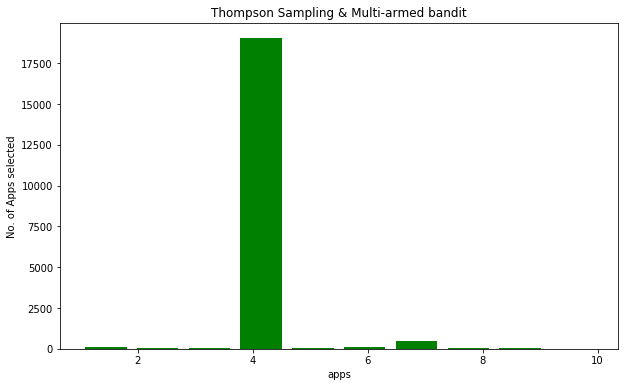

In [9]:
range = (1, 10) 
bins = 10
# plotting a histogram
plt.figure(figsize=(10,6))
plt.hist(selected_app, bins, range, color = 'green', histtype = 'bar', rwidth = 0.8) 
# x-axis label 
plt.xlabel('apps') 
# frequency label 
plt.ylabel('No. of Apps selected') 
# plot title 
plt.title('Thompson Sampling & Multi-armed bandit')
plt.show() 

### Application use Thompson Sampling

- Google Content Experiments
- Netflix Item based recommender systems: Images related to movies/shows are shown to users in such a way that they are more likely to watch it.
- Bidding and Stock Exchange: Predicting Stocks based on Current data of stock prizes.
- Traffic Light Control: Predicting the delay in signal.
- Automation in Industries: Bots and Machines for transporting and Delivering items without human intervention.

### Feedback

#### References

- https://docs.python.org/3/library/random.html
- http://www0.cs.ucl.ac.uk/staff/d.silver/web/Teaching.html